In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from epiweeks import Year
from sklearn.linear_model import LinearRegression
#import geopandas as gpd
#import geobr

In [2]:
sys.path.append('..')

## Manacapuru

In [3]:
res_path = '../Data/analyzed/res_epi_curve_130250.csv'
df_res = pd.read_csv(res_path)

years = (df_res['DATA_EPI'].astype(str).str[:4]).unique()
years_int = [eval(i) for i in years]

year_week_epi = []
for year in years_int:
    nweeks_year = Year(year).totalweeks()
    weeks_year = list(np.arange(1,nweeks_year+1))
    weeks_year = [str(x) for x in weeks_year]
    weeks_year = ['0'+x if len(x) == 1 else x for x in weeks_year]
    weeks_year = [str(year)+'-'+x for x in weeks_year]
    year_week_epi.extend(weeks_year)

cases_week_epi = list(np.zeros(len(year_week_epi)))
df_aux = pd.DataFrame({'DATA_EPI': year_week_epi, 'CASO': cases_week_epi})
df_res = df_res.merge(df_aux,how = 'right', on = 'DATA_EPI' )

df_res['CASES_RES'] = df_res['CASO_x']
df_res = df_res.drop(columns = ['Unnamed: 0', 'CASO_x','CASO_y'])
df_res = df_res.fillna(0)

In [4]:
df_res['CASES_RES_N'] = (df_res['CASES_RES']/99613)

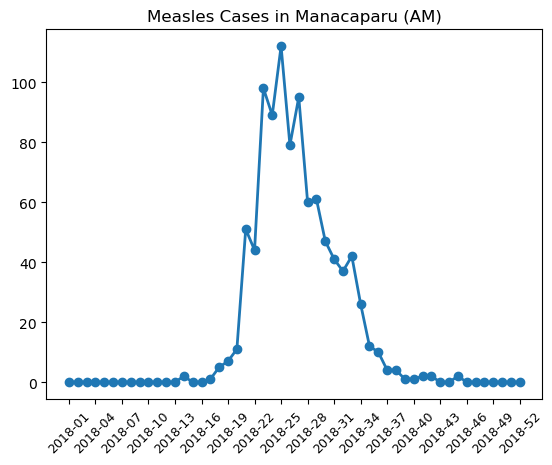

In [5]:
x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'-o', label = 'Residents', linewidth = 2)
x_ticks = np.arange(0,len(x),3)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Manacaparu (AM)')
plt.show()

C = df_res['CASES_RES'].sum()

In [6]:
df_res['CASES_RES'].sum()

946.0

In [7]:
df_res

,DATA_EPI,CASES_RES,CASES_RES_N
0,2018-01,0.0,0.000000
1,2018-02,0.0,0.000000
2,2018-03,0.0,0.000000
3,2018-04,0.0,0.000000
4,2018-05,0.0,0.000000
5,2018-06,0.0,0.000000
6,2018-07,0.0,0.000000
7,2018-08,0.0,0.000000
8,2018-09,0.0,0.000000
9,2018-10,0.0,0.000000


In [8]:
df_fit = df_res[17:23]
df_fit['DAYS'] = [0,7,14,21,28,35]

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_10960\3372236209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fit['DAYS'] = [0,7,14,21,28,35]


In [9]:
time = np.array(df_fit['DAYS'])
cases = np.array(df_fit['CASES_RES_N'])
logcases = np.log(cases)

In [10]:
time = time.reshape((-1, 1))
model = LinearRegression().fit(time, logcases)

In [11]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -10.032849561426751
slope: [0.08949558]


In [12]:
slope = model.coef_
intercept = model.intercept_

In [14]:
R0 = 2*slope[0]/((946.0/99613)*(1/7))
S0 = 1/(R0) + (946/99613)/2

In [15]:
R0 = 2*slope[0]/((946.0/99613)*(1/7))
print('R0 = ', R0)
print('S0 = ',S0)
print('S0*N =',S0*99613)
print('C*N = ', C)

R0 =  131.93332173529637
S0 =  0.012327962531582243
S0*N = 1228.025331658502
C*N =  946.0


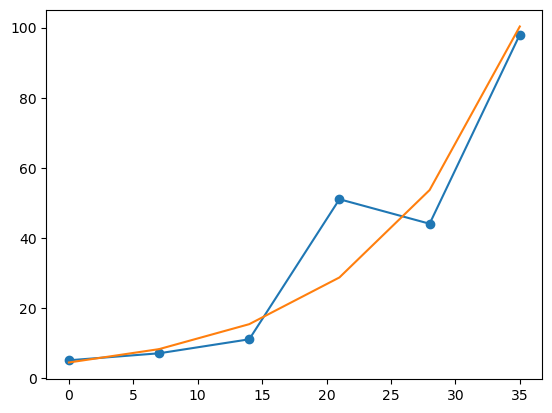

In [16]:
plt.plot(time,cases*99613,'-o')
plt.plot(time,99613*np.exp(slope*time + intercept))

## Manaus

In [ ]:
N = 2255903

res_path = '../Data/analyzed/res_epi_curve_130260.csv'
df_res = pd.read_csv(res_path)

years = (df_res['DATA_EPI'].astype(str).str[:4]).unique()
years_int = [eval(i) for i in years]

year_week_epi = []
for year in years_int:
    nweeks_year = Year(year).totalweeks()
    weeks_year = list(np.arange(1,nweeks_year+1))
    weeks_year = [str(x) for x in weeks_year]
    weeks_year = ['0'+x if len(x) == 1 else x for x in weeks_year]
    weeks_year = [str(year)+'-'+x for x in weeks_year]
    year_week_epi.extend(weeks_year)

cases_week_epi = list(np.zeros(len(year_week_epi)))
df_aux = pd.DataFrame({'DATA_EPI': year_week_epi, 'CASO': cases_week_epi})
df_res = df_res.merge(df_aux,how = 'right', on = 'DATA_EPI' )

df_res['CASES_RES'] = df_res['CASO_x']
df_res = df_res.drop(columns = ['Unnamed: 0', 'CASO_x','CASO_y'])
df_res = df_res.fillna(0)

df_res['CASES_RES_N'] = (df_res['CASES_RES']/N)

x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'-o', label = 'Residents', linewidth = 2)
x_ticks = np.arange(0,len(x),7)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Manaus(AM)')
plt.show()

C = df_res['CASES_RES'].sum()

In [ ]:
df_fit = df_res[8:24]
df_fit['DAYS'] = np.arange(0,df_fit.shape[0]*7,7)

In [ ]:
time = np.array(df_fit['DAYS'])
cases = np.array(df_fit['CASES_RES_N'])
logcases = np.log(cases)

time = time.reshape((-1, 1))
model = LinearRegression().fit(time, logcases)

In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

In [ ]:
slope = model.coef_
intercept = model.intercept_

R0 = 2*slope[0]/((C/N)*(1/7))
print('R0 = ', R0)

S0 = 1/(R0) + (C/N)/2
print('S0 = ',S0)
print('S0*N =',S0*N)
print('C*N = ', C)

In [ ]:
plt.plot(time,cases*N,'-o')
plt.plot(time,N*np.exp(slope*time + intercept))

## Francisco Morato

In [ ]:
N = 165139

res_path = '../Data/analyzed/res_epi_curve_351630.csv'
df_res = pd.read_csv(res_path)

years = (df_res['DATA_EPI'].astype(str).str[:4]).unique()
years_int = [eval(i) for i in years]

year_week_epi = []
for year in years_int:
    nweeks_year = Year(year).totalweeks()
    weeks_year = list(np.arange(1,nweeks_year+1))
    weeks_year = [str(x) for x in weeks_year]
    weeks_year = ['0'+x if len(x) == 1 else x for x in weeks_year]
    weeks_year = [str(year)+'-'+x for x in weeks_year]
    year_week_epi.extend(weeks_year)

cases_week_epi = list(np.zeros(len(year_week_epi)))
df_aux = pd.DataFrame({'DATA_EPI': year_week_epi, 'CASO': cases_week_epi})
df_res = df_res.merge(df_aux,how = 'right', on = 'DATA_EPI' )

df_res['CASES_RES'] = df_res['CASO_x']
df_res = df_res.drop(columns = ['Unnamed: 0', 'CASO_x','CASO_y'])
df_res = df_res.fillna(0)

df_res['CASES_RES_N'] = (df_res['CASES_RES']/N)

x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'-o', label = 'Residents', linewidth = 2)
x_ticks = np.arange(0,len(x),7)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Francisco Morato (SP)')
plt.show()

C = df_res['CASES_RES'].sum()

In [ ]:
df_fit = df_res[28:33]
df_fit['DAYS'] = np.arange(0,df_fit.shape[0]*7,7)

In [ ]:
time = np.array(df_fit['DAYS'])
cases = np.array(df_fit['CASES_RES_N'])
logcases = np.log(cases)

time = time.reshape((-1, 1))
model = LinearRegression().fit(time, logcases)

In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

In [ ]:
slope = model.coef_
intercept = model.intercept_

R0 = 2*slope[0]/((C/N)*(1/7))
print('R0 = ', R0)

S0 = 1/(R0) + (C/N)/2
print('S0 = ',S0)
print('S0*N =',S0*N)
print('C*N = ', C)

In [ ]:
plt.plot(time,cases*N,'-o')
plt.plot(time,N*np.exp(slope*time + intercept))

## Sao Paulo

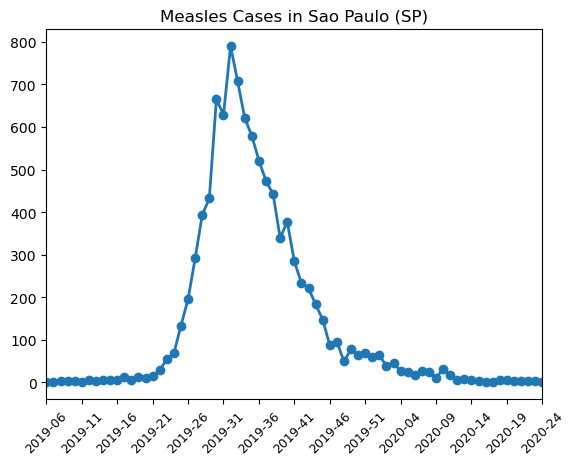

In [17]:
N = 11451245

res_path = '../Data/analyzed/res_epi_curve_355030.csv'
df_res = pd.read_csv(res_path)

years = (df_res['DATA_EPI'].astype(str).str[:4]).unique()
years_int = [eval(i) for i in years]

year_week_epi = []
for year in years_int:
    nweeks_year = Year(year).totalweeks()
    weeks_year = list(np.arange(1,nweeks_year+1))
    weeks_year = [str(x) for x in weeks_year]
    weeks_year = ['0'+x if len(x) == 1 else x for x in weeks_year]
    weeks_year = [str(year)+'-'+x for x in weeks_year]
    year_week_epi.extend(weeks_year)

cases_week_epi = list(np.zeros(len(year_week_epi)))
df_aux = pd.DataFrame({'DATA_EPI': year_week_epi, 'CASO': cases_week_epi})
df_res = df_res.merge(df_aux,how = 'right', on = 'DATA_EPI' )

df_res['CASES_RES'] = df_res['CASO_x']
df_res = df_res.drop(columns = ['Unnamed: 0', 'CASO_x','CASO_y'])
df_res = df_res.fillna(0)

df_res['CASES_RES_N'] = (df_res['CASES_RES']/N)

x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'-o', label = 'Residents', linewidth = 2)
x_ticks = np.arange(0,len(x),5)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Sao Paulo (SP)')
plt.xlim((370,440))
plt.show()

C = df_res['CASES_RES'].sum()

In [18]:
df_fit = df_res[384:393]
df_fit['DAYS'] = np.arange(0,df_fit.shape[0]*7,7)

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_10960\2023701238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fit['DAYS'] = np.arange(0,df_fit.shape[0]*7,7)


In [19]:
time = np.array(df_fit['DAYS'])
cases = np.array(df_fit['CASES_RES_N'])
logcases = np.log(cases)

time = time.reshape((-1, 1))
model = LinearRegression().fit(time, logcases)

In [20]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -13.894983403014185
slope: [0.06785826]


In [21]:
slope = model.coef_
intercept = model.intercept_

R0 = 2*slope[0]/((C/N)*(1/10))
print('R0 = ', R0)

S0 = 1/(R0) + (C/N)/2
print('S0 = ',S0)
print('S0*N =',S0*N)
print('C*N = ', C)

R0 =  1578.751603936315
S0 =  0.0010632341258812188
S0*N = 12175.354467826677
C*N =  9844.0


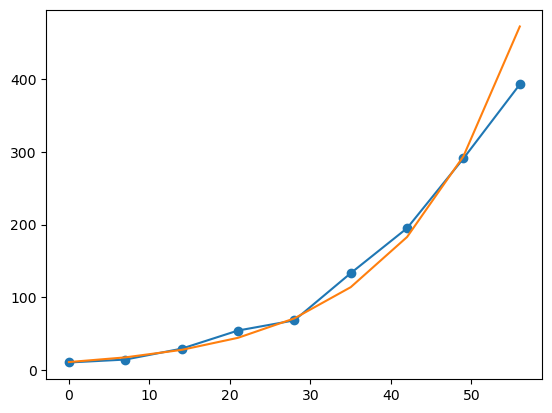

In [22]:
plt.plot(time,cases*N,'-o')
plt.plot(time,N*np.exp(slope*time + intercept))

## Rio de Janeiro

In [ ]:
N = 6211423

res_path = '../Data/analyzed/res_epi_curve_330455.csv'
df_res = pd.read_csv(res_path)

years = (df_res['DATA_EPI'].astype(str).str[:4]).unique()
years_int = [eval(i) for i in years]

year_week_epi = []
for year in years_int:
    nweeks_year = Year(year).totalweeks()
    weeks_year = list(np.arange(1,nweeks_year+1))
    weeks_year = [str(x) for x in weeks_year]
    weeks_year = ['0'+x if len(x) == 1 else x for x in weeks_year]
    weeks_year = [str(year)+'-'+x for x in weeks_year]
    year_week_epi.extend(weeks_year)

cases_week_epi = list(np.zeros(len(year_week_epi)))
df_aux = pd.DataFrame({'DATA_EPI': year_week_epi, 'CASO': cases_week_epi})
df_res = df_res.merge(df_aux,how = 'right', on = 'DATA_EPI' )

df_res['CASES_RES'] = df_res['CASO_x']
df_res = df_res.drop(columns = ['Unnamed: 0', 'CASO_x','CASO_y'])
df_res = df_res.fillna(0)

df_res['CASES_RES_N'] = (df_res['CASES_RES']/N)

x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'-o', label = 'Residents', linewidth = 2)
x_ticks = np.arange(0,len(x),10)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Rio de Janeiro (RJ)')
plt.xlim((230,300))
plt.show()

C = df_res['CASES_RES'].sum()

## Belem

In [ ]:
N = 1506420

res_path = '../Data/analyzed/res_epi_curve_150140.csv'
df_res = pd.read_csv(res_path)
years = (df_res['DATA_EPI'].astype(str).str[:4]).unique()
years_int = [eval(i) for i in years]

year_week_epi = []
for year in years_int:
    nweeks_year = Year(year).totalweeks()
    weeks_year = list(np.arange(1,nweeks_year+1))
    weeks_year = [str(x) for x in weeks_year]
    weeks_year = ['0'+x if len(x) == 1 else x for x in weeks_year]
    weeks_year = [str(year)+'-'+x for x in weeks_year]
    year_week_epi.extend(weeks_year)

cases_week_epi = list(np.zeros(len(year_week_epi)))
df_aux = pd.DataFrame({'DATA_EPI': year_week_epi, 'CASO': cases_week_epi})
df_res = df_res.merge(df_aux,how = 'right', on = 'DATA_EPI' )

df_res['CASES_RES'] = df_res['CASO_x']
df_res = df_res.drop(columns = ['Unnamed: 0', 'CASO_x','CASO_y'])
df_res = df_res.fillna(0)

df_res['CASES_RES_N'] = (df_res['CASES_RES']/N)

x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'-o', label = 'Residents', linewidth = 2)
x_ticks = np.arange(0,len(x),10)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Belem (PR)')
plt.xlim((120,200))
plt.show()

C = df_res['CASES_RES'].sum()

In [ ]:
df_fit = df_res[144:160]
df_fit['DAYS'] = np.arange(0,df_fit.shape[0]*7,7)

In [ ]:
time = np.array(df_fit['DAYS'])
cases = np.array(df_fit['CASES_RES_N'])
logcases = np.log(cases)

time = time.reshape((-1, 1))
model = LinearRegression().fit(time, logcases)

In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

In [ ]:
slope = model.coef_
intercept = model.intercept_

R0 = 2*slope[0]/((C/N)*(1/7))
print('R0 = ', R0)

S0 = 1/(R0) + (C/N)/2
print('S0 = ',S0)
print('S0*N =',S0*N)
print('C*N = ', C)

In [ ]:
plt.plot(time,cases*N,'-o')
plt.plot(time,N*np.exp(slope*time + intercept))